In [1]:
import pandas as pd

weather_data=pd.read_csv("weather_data.csv",index_col="DATE")   
#distinguish rows based on the DATE column

In [2]:
weather_data

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN,NaN
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN,NaN
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,84.0,57.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN,NaN
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",NaN,99.0,NaN,88.0
2024-05-23,IN005010600,"AHMADABAD, IN",NaN,100.0,NaN,87.0
2024-05-24,IN005010600,"AHMADABAD, IN",NaN,98.0,NaN,86.0


In [3]:
weather_data.apply(pd.isnull).sum()    #no of null values in each column

STATION        0
NAME           0
PRCP        8451
TAVG        3360
TMAX       10325
TMIN        8877
dtype: int64

In [4]:
NaN_percent=weather_data.apply(pd.isnull).sum()/weather_data.shape[0]
#percentage of NaN(null) values in each column

In [5]:
NaN_percent

STATION    0.000000
NAME       0.000000
PRCP       0.376068
TAVG       0.149519
TMAX       0.459461
TMIN       0.395025
dtype: float64

In [6]:
valid_columns=weather_data.columns[NaN_percent<0.4]
#keep the columns where null percent is <40

In [7]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMIN'], dtype='object')

In [8]:
weather_data=weather_data[valid_columns].copy()   
#convert the data to only valid columns

In [9]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN
DATE,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",NaN,99.0,88.0
2024-05-23,IN005010600,"AHMADABAD, IN",NaN,100.0,87.0
2024-05-24,IN005010600,"AHMADABAD, IN",NaN,98.0,86.0


In [10]:
#fill the missing values with the last non-missing values
#This works because there is not much tragic change in weather conditions in a day

weather_data=weather_data.ffill()

In [11]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN
DATE,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,NaN,NaN
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0


In [12]:
weather_data.iloc[0:2] = weather_data.iloc[2]
#fill the first two rows as same as the third row

In [13]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN
DATE,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0
...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0


In [14]:
weather_data.apply(pd.isnull).sum() 
#check null values in each column

STATION    0
NAME       0
PRCP       0
TAVG       0
TMIN       0
dtype: int64

In [15]:
weather_data.dtypes   #to get data types of the columns
#object data type usually indicates string

STATION     object
NAME        object
PRCP       float64
TAVG       float64
TMIN       float64
dtype: object

In [16]:
weather_data.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
       '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26'],
      dtype='object', name='DATE', length=22472)

DATE is stored as object. But we will convert it to date to make further processing easier

In [17]:
weather_data.index=pd.to_datetime(weather_data.index)

In [18]:
weather_data.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26'],
              dtype='datetime64[ns]', name='DATE', length=22472, freq=None)

In [19]:
weather_data.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=22472)

In [20]:
weather_data.index.year.value_counts().sort_index()
#gives count of how many times a year appears in the data and sorts based on the year

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    362
2021    356
2022    358
2023    365
2024    141
Name: count, Length: 63, dtype: int64

<Axes: xlabel='DATE'>

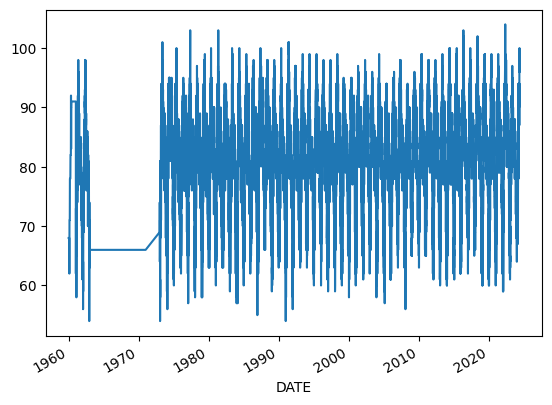

In [21]:
weather_data["TAVG"].plot()

pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)  # None means unlimited columns
pd.set_option('display.max_colwidth', None)  # Set the max column width
pd.set_option('display.width', None)  # Set the display width
#above lines are to display complete data
print(weather_data)

#### Training the model

In [22]:
weather_data["target"]=weather_data.shift(-1)["TAVG"]

#creating target for prediction of 'TAVG'

In [23]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target
DATE,,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0


The last block in target column is null as we dont have tomorrow's data here
So we can fill the last block using the value of the previous block




In [25]:
weather_data.iloc[-1, -1] = weather_data.iloc[-2, -1]

In [26]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target
DATE,,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0
...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0


In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge_reg=Ridge(alpha=0.1)

Now we have to create a list of predictor cols. The cols of data for which we are making the prediction. This will include cols except name, station and target

In [29]:
~weather_data.columns.isin(["NAME","STATION","target"])

array([False, False,  True,  True,  True, False])

In [30]:
predictor_cols=weather_data.columns[~weather_data.columns.isin(["NAME","STATION","target"])]

In [31]:
predictor_cols

Index(['PRCP', 'TAVG', 'TMIN'], dtype='object')

In [32]:
def back_test(weather_data,model,predictor_cols,start=3650,step=90):
    all_predictions=[]

    for i in range(start,weather_data.shape[0],step):
        train=weather_data.iloc[:i,:]
        test=weather_data.iloc[i:(i+step),:]

        model.fit(train[predictor_cols],train["target"])

        preds=model.predict(test[predictor_cols])

        preds=pd.Series(preds,index=test.index)  #converting numpy array into pandas series data
        combined=pd.concat([test["target"],preds],axis=1)  #axis=1 -> treat everything as separate cols

        combined.columns=["actual","prediction"]

        combined["diff"]=(combined["prediction"]-combined["actual"]).abs()
        #difference between the prediction and the actual value

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [36]:
predictions=back_test(weather_data,ridge_reg,predictor_cols)

In [37]:
predictions

,actual,prediction,diff
DATE,,,
1969-12-30,66.0,66.034907,0.034907
1969-12-31,66.0,66.034907,0.034907
1970-01-01,66.0,66.034907,0.034907
1970-01-02,66.0,66.034907,0.034907
1970-01-03,66.0,66.034907,0.034907
...,...,...,...
2024-05-22,100.0,98.365150,1.634850
2024-05-23,98.0,99.242090,1.242090
2024-05-24,97.0,97.353888,0.353888


Analysing error in the predictions

In [38]:
predictions["diff"].mean()

#mean absolute error in the predicted values

1.8295480813685618

In [39]:
def percent_err(val1,val2):
    return (val2-val1)/val1

#percentage error function

In [41]:
def rolling_avg(weather,days,col):                   #computing the rolling mean
    label=f"rolling_avg_{days}-{col}"

    weather[label]=weather[col].rolling(days).mean()
    weather[f"{label}_percent"]= percent_err(weather[label],weather[col])

    return weather

In [43]:
rolling_days=[3,14]

for day in rolling_days:
    for col in ["TAVG","TMIN","PRCP"]:
        weather_data=rolling_avg(weather_data,day,col)

In [44]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target,rolling_avg_3-TAVG,rolling_avg_3-TAVG_percent,rolling_avg_3-TMIN,rolling_avg_3-TMIN_percent,rolling_avg_3-PRCP,rolling_avg_3-PRCP_percent,rolling_avg_14-TAVG,rolling_avg_14-TAVG_percent,rolling_avg_14-TMIN,rolling_avg_14-TMIN_percent,rolling_avg_14-PRCP,rolling_avg_14-PRCP_percent
DATE,,,,,,,,,,,,,,,,,,
1960-01-01,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0,98.666667,0.003378,87.333333,0.007634,0.0,NaN,94.857143,0.043675,83.785714,0.050298,0.0,NaN
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0,99.000000,0.010101,87.333333,-0.003817,0.0,NaN,95.357143,0.048689,84.000000,0.035714,0.0,NaN
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0,99.000000,-0.010101,87.000000,-0.011494,0.0,NaN,95.714286,0.023881,84.142857,0.022071,0.0,NaN


Now, as we can see, we have some missing values in this data. The first 14 rows contain NULL values. We need to fix this!

In [45]:
weather_data=weather_data.iloc[14:,:]    #cut out the first 14 rows

In [46]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target,rolling_avg_3-TAVG,rolling_avg_3-TAVG_percent,rolling_avg_3-TMIN,rolling_avg_3-TMIN_percent,rolling_avg_3-PRCP,rolling_avg_3-PRCP_percent,rolling_avg_14-TAVG,rolling_avg_14-TAVG_percent,rolling_avg_14-TMIN,rolling_avg_14-TMIN_percent,rolling_avg_14-PRCP,rolling_avg_14-PRCP_percent
DATE,,,,,,,,,,,,,,,,,,
1960-01-15,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-16,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-17,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-18,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-19,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,NaN,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0,98.666667,0.003378,87.333333,0.007634,0.0,NaN,94.857143,0.043675,83.785714,0.050298,0.000000,NaN
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0,99.000000,0.010101,87.333333,-0.003817,0.0,NaN,95.357143,0.048689,84.000000,0.035714,0.000000,NaN
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0,99.000000,-0.010101,87.000000,-0.011494,0.0,NaN,95.714286,0.023881,84.142857,0.022071,0.000000,NaN


There are still some remaining NULL values. We shall fix this too!

In [48]:
weather_data=weather_data.fillna(0)  
#filling the null values with zero

In [49]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target,rolling_avg_3-TAVG,rolling_avg_3-TAVG_percent,rolling_avg_3-TMIN,rolling_avg_3-TMIN_percent,rolling_avg_3-PRCP,rolling_avg_3-PRCP_percent,rolling_avg_14-TAVG,rolling_avg_14-TAVG_percent,rolling_avg_14-TMIN,rolling_avg_14-TMIN_percent,rolling_avg_14-PRCP,rolling_avg_14-PRCP_percent
DATE,,,,,,,,,,,,,,,,,,
1960-01-15,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,0.0,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-16,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,0.0,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-17,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,0.0,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-18,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,0.0,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
1960-01-19,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,0.0,0.0,68.000000,0.000000,57.000000,0.000000,0.017857,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0,98.666667,0.003378,87.333333,0.007634,0.0,0.0,94.857143,0.043675,83.785714,0.050298,0.000000,0.0
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0,99.000000,0.010101,87.333333,-0.003817,0.0,0.0,95.357143,0.048689,84.000000,0.035714,0.000000,0.0
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0,99.000000,-0.010101,87.000000,-0.011494,0.0,0.0,95.714286,0.023881,84.142857,0.022071,0.000000,0.0


In [50]:
def exp_mean(df):
    return df.expanding(1).mean()
#calculate the expanding mean of each col in a dataframe

In [52]:
for col in ["TAVG","TMIN","PRCP"]:
    weather_data[f"month_avg_{col}"]=weather_data[col].groupby(weather_data.index.month,group_keys=False).apply(exp_mean)
    #finding the averages in a given month

    weather_data[f"day_avg_{col}"]=weather_data[col].groupby(weather_data.index.day_of_year,group_keys=False).apply(exp_mean)


In [53]:
weather_data

,STATION,NAME,PRCP,TAVG,TMIN,target,rolling_avg_3-TAVG,rolling_avg_3-TAVG_percent,rolling_avg_3-TMIN,rolling_avg_3-TMIN_percent,...,rolling_avg_14-TMIN,rolling_avg_14-TMIN_percent,rolling_avg_14-PRCP,rolling_avg_14-PRCP_percent,month_avg_TAVG,day_avg_TAVG,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-15,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,...,57.000000,0.000000,0.017857,-1.0,68.000000,68.000000,57.000000,57.000000,0.000000,0.000000
1960-01-16,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,...,57.000000,0.000000,0.017857,-1.0,68.000000,68.000000,57.000000,57.000000,0.000000,0.000000
1960-01-17,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,...,57.000000,0.000000,0.017857,-1.0,68.000000,68.000000,57.000000,57.000000,0.000000,0.000000
1960-01-18,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,...,57.000000,0.000000,0.017857,-1.0,68.000000,68.000000,57.000000,57.000000,0.000000,0.000000
1960-01-19,IN005010600,"AHMADABAD, IN",0.0,68.0,57.0,68.0,68.000000,0.000000,57.000000,0.000000,...,57.000000,0.000000,0.017857,-1.0,68.000000,68.000000,57.000000,57.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,IN005010600,"AHMADABAD, IN",0.0,99.0,88.0,100.0,98.666667,0.003378,87.333333,0.007634,...,83.785714,0.050298,0.000000,0.0,89.325157,89.730159,76.553758,77.412698,0.009849,0.001270
2024-05-23,IN005010600,"AHMADABAD, IN",0.0,100.0,87.0,98.0,99.000000,0.010101,87.333333,-0.003817,...,84.000000,0.035714,0.000000,0.0,89.330725,90.158730,76.559207,77.714286,0.009844,0.000635
2024-05-24,IN005010600,"AHMADABAD, IN",0.0,98.0,86.0,97.0,99.000000,-0.010101,87.000000,-0.011494,...,84.142857,0.022071,0.000000,0.0,89.335245,89.619048,76.564129,77.857143,0.009838,0.000000


In [54]:
predictor_cols=weather_data.columns[~weather_data.columns.isin(["NAME","STATION","target"])]

In [55]:
predictor_cols

Index(['PRCP', 'TAVG', 'TMIN', 'rolling_avg_3-TAVG',
       'rolling_avg_3-TAVG_percent', 'rolling_avg_3-TMIN',
       'rolling_avg_3-TMIN_percent', 'rolling_avg_3-PRCP',
       'rolling_avg_3-PRCP_percent', 'rolling_avg_14-TAVG',
       'rolling_avg_14-TAVG_percent', 'rolling_avg_14-TMIN',
       'rolling_avg_14-TMIN_percent', 'rolling_avg_14-PRCP',
       'rolling_avg_14-PRCP_percent', 'month_avg_TAVG', 'day_avg_TAVG',
       'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP', 'day_avg_PRCP'],
      dtype='object')

In [59]:
predictions=back_test(weather_data,ridge_reg,predictor_cols)

In [65]:
predictions["diff"].mean()    #mean absolute error

1.7797756073102218

In [66]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
1976-06-01,76.0,92.854170,16.854170
1980-09-29,72.0,85.155570,13.155570
1998-06-08,80.0,92.598971,12.598971
2012-04-19,80.0,92.199832,12.199832
2019-04-15,81.0,93.170596,12.170596
...,...,...,...
1970-10-18,66.0,65.999560,0.000440
2010-06-22,92.0,91.999573,0.000427
1970-06-08,66.0,66.000330,0.000330


Checking error ranges

In [67]:
predictions["diff"].round().value_counts()

diff
1.0     6051
2.0     4168
0.0     3909
3.0     2320
4.0     1182
5.0      573
6.0      306
7.0      133
8.0       83
9.0       41
10.0      22
11.0      10
12.0       7
13.0       2
17.0       1
Name: count, dtype: int64

In [69]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     3909
1.0     6051
2.0     4168
3.0     2320
4.0     1182
5.0      573
6.0      306
7.0      133
8.0       83
9.0       41
10.0      22
11.0      10
12.0       7
13.0       2
17.0       1
Name: count, dtype: int64

<Axes: xlabel='diff'>

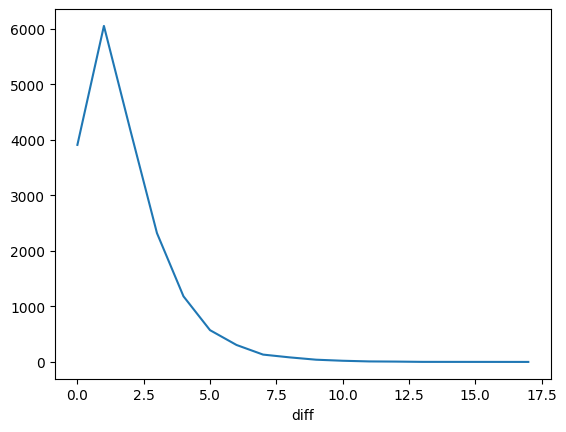

In [70]:
predictions["diff"].round().value_counts().sort_index().plot()